In [49]:
import numpy as np
import math
import matplotlib.pyplot as plt
import lightcones.linalg as ll
from scipy.sparse.linalg import eigsh, eigs
import scipy.sparse as sparse

In [50]:
epsilons = [0.1, 0.2]
alphas = [0.2, -0.2]
omegas = [1, 3]
dt = 0.01
t_past = 40
t_future = 40 

In [51]:
n_rel = 10

In [52]:
t_max = t_past + t_future
t = np.arange(0, t_max, dt)
n_t_max = len(t)

In [53]:
n_t_past = int(t_past / dt)
n_t_future = int(t_future / dt)

In [54]:
M = np.zeros(n_t_max) 
for i in range(n_t_max):
    for j in range(len(epsilons)):
        M[i] = M[i] + alphas[j] * math.exp(- epsilons[j] * abs(t[i] - t[0])) * math.sin(omegas[j] * abs(t[i] - t[0]))

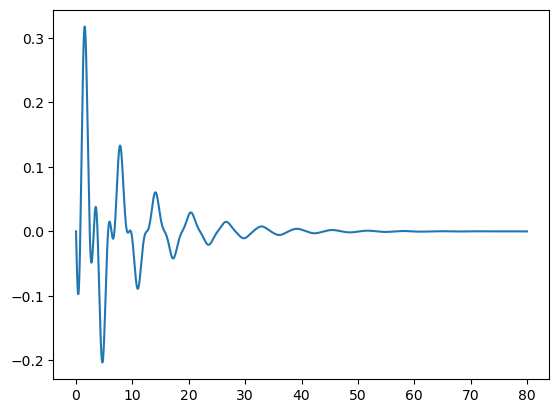

In [55]:
#plt.yscale('log')
plt.plot(t, M)

In [56]:
def apply_memory_matrix(x):
    x_out = np.zeros(n_t_past)
    for i in range(n_t_future):
        m = M[i:i+n_t_past]
        x_out = x_out + np.vdot(m, x) * m
    return x_out

memory_matrix = sparse.linalg.LinearOperator((n_t_past, n_t_past), matvec=apply_memory_matrix)

In [57]:
pi, v = eigsh(memory_matrix, k=n_rel, which='LM')

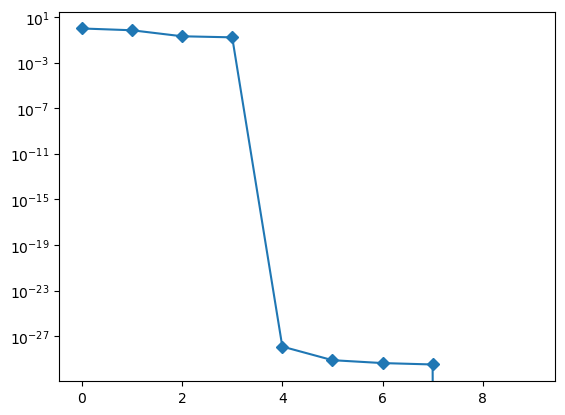

In [58]:
plt.yscale('log')
plt.plot(pi[::-1] / pi[-1], marker='D')

In [59]:
v_in = np.zeros(n_t_past)
v_in[0] = 1
v_shifted = np.vstack((np.zeros(n_rel), v[:-1, :]))
U = np.column_stack((v_in, v_shifted)) 

In [60]:
rho = U.T.conj() @ (memory_matrix @ U)

In [61]:
pi_, v_ = ll.find_eigs_descending(rho)

In [62]:
len(pi_)

11

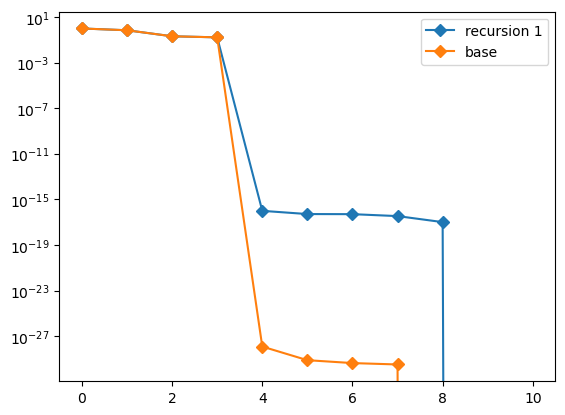

In [63]:
plt.yscale('log')
plt.plot(pi_ / pi_[0], label='recursion 1', marker='D')
plt.plot(pi[::-1] / pi[-1], label='base', marker='D')
plt.legend()

In [64]:
pi_[-1] / pi_[0]

np.float64(-3.1580005976197165e-18)

In [65]:
pi_[1] / pi_[0]

np.float64(0.6972055393385094)